In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
wind_turbine = pd.read_csv('T1.csv')
wind_turbine.columns = ['Date/Time', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Theoretical_Curve(kWh)', 'Wind']
del wind_turbine['Wind']
wind_turbine['Date/Time'] = pd.to_datetime(wind_turbine['Date/Time'], format='%d %m %Y %H:%M')
display(wind_turbine)

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Curve(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


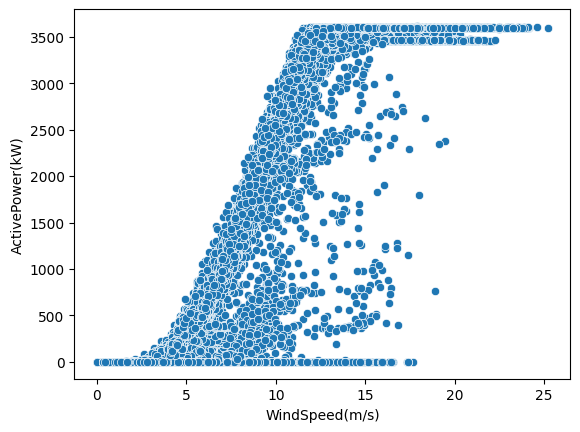

In [10]:
sns.scatterplot(data=wind_turbine, x='WindSpeed(m/s)', y='ActivePower(kW)')
plt.show()

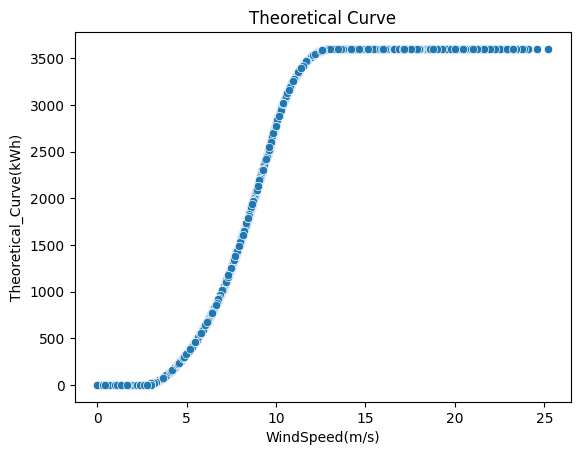

In [11]:
sns.scatterplot(data=wind_turbine, x='WindSpeed(m/s)', y='Theoretical_Curve(kWh)')
plt.title('Theoretical Curve')
plt.show()

In [12]:
# Limite aceitável
pot_real = wind_turbine['ActivePower(kW)'].tolist()
pot_teorica = wind_turbine['Theoretical_Curve(kWh)'].tolist()
pot_max = []
pot_min = []
limit_inside = []

for i in pot_teorica:
    pot_max.append(i*1.05)
    pot_min.append(i*0.95)

print(len(pot_max), len(pot_min), len(pot_teorica))

for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        limit_inside.append('Dentro')
    elif potencia == 0:
        limit_inside.append('Zero')
    else:
        limit_inside.append('Fora')


print(limit_inside.count('Dentro')/len(limit_inside))

50530 50530 50530
0.37286760340391845


In [13]:
wind_turbine['Limit_Inside'] = limit_inside
display(wind_turbine)

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Curve(kWh),Limit_Inside
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


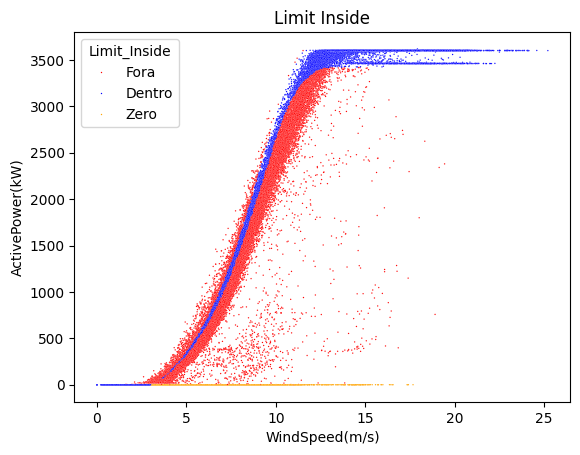

In [7]:
cores = {
    'Dentro': 'blue',
    'Fora': 'red',
    'Zero': 'orange'
}
sns.scatterplot(data=wind_turbine, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='Limit_Inside', s=1, palette=cores)
plt.title('Limit Inside')
plt.show()